## Mengimport library dan dataset

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# mengimport toy dataset dari scikit
data = datasets.load_wine()

# membuat variabel x dan y untuk menyimpan data dan target
x = data.data
y = data.target

# membentuk dataset untuk nilai variabel x dan y
df_x = pd.DataFrame(data.data, columns = data.feature_names)
df_y = pd.Series(y, name='target')

In [191]:
df_x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [192]:
df_y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [193]:
# menggabungkan data dan target ke dalam satu variabel
df = pd.concat([df_x,df_y], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

## Data Assessing

In [194]:
# memeriksa kualitas data, memastikan tidak ada data yang hilang
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [195]:
# memeriksa nilai unik target
df['target'].unique()

array([0, 1, 2])

## Model Training
Sebelum melakukan training keempat model, data dipisahkan menjadi data train dan test.

In [196]:
# melakukan data split, 80% untuk train dan 20% untuk test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [197]:
# memeriksa jumlah sampel setelah split data
print(f"Training set: {x_train.shape[0]} sampel")
print(f"Testing set: {x_test.shape[0]} sampel")

Training set: 142 sampel
Testing set: 36 sampel


### Decision Tree

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [199]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)

# evaluasi akurasi training dan testing
train_acc = decision_tree.score(x_train, y_train)
test_acc = decision_tree.score(x_test, y_test)

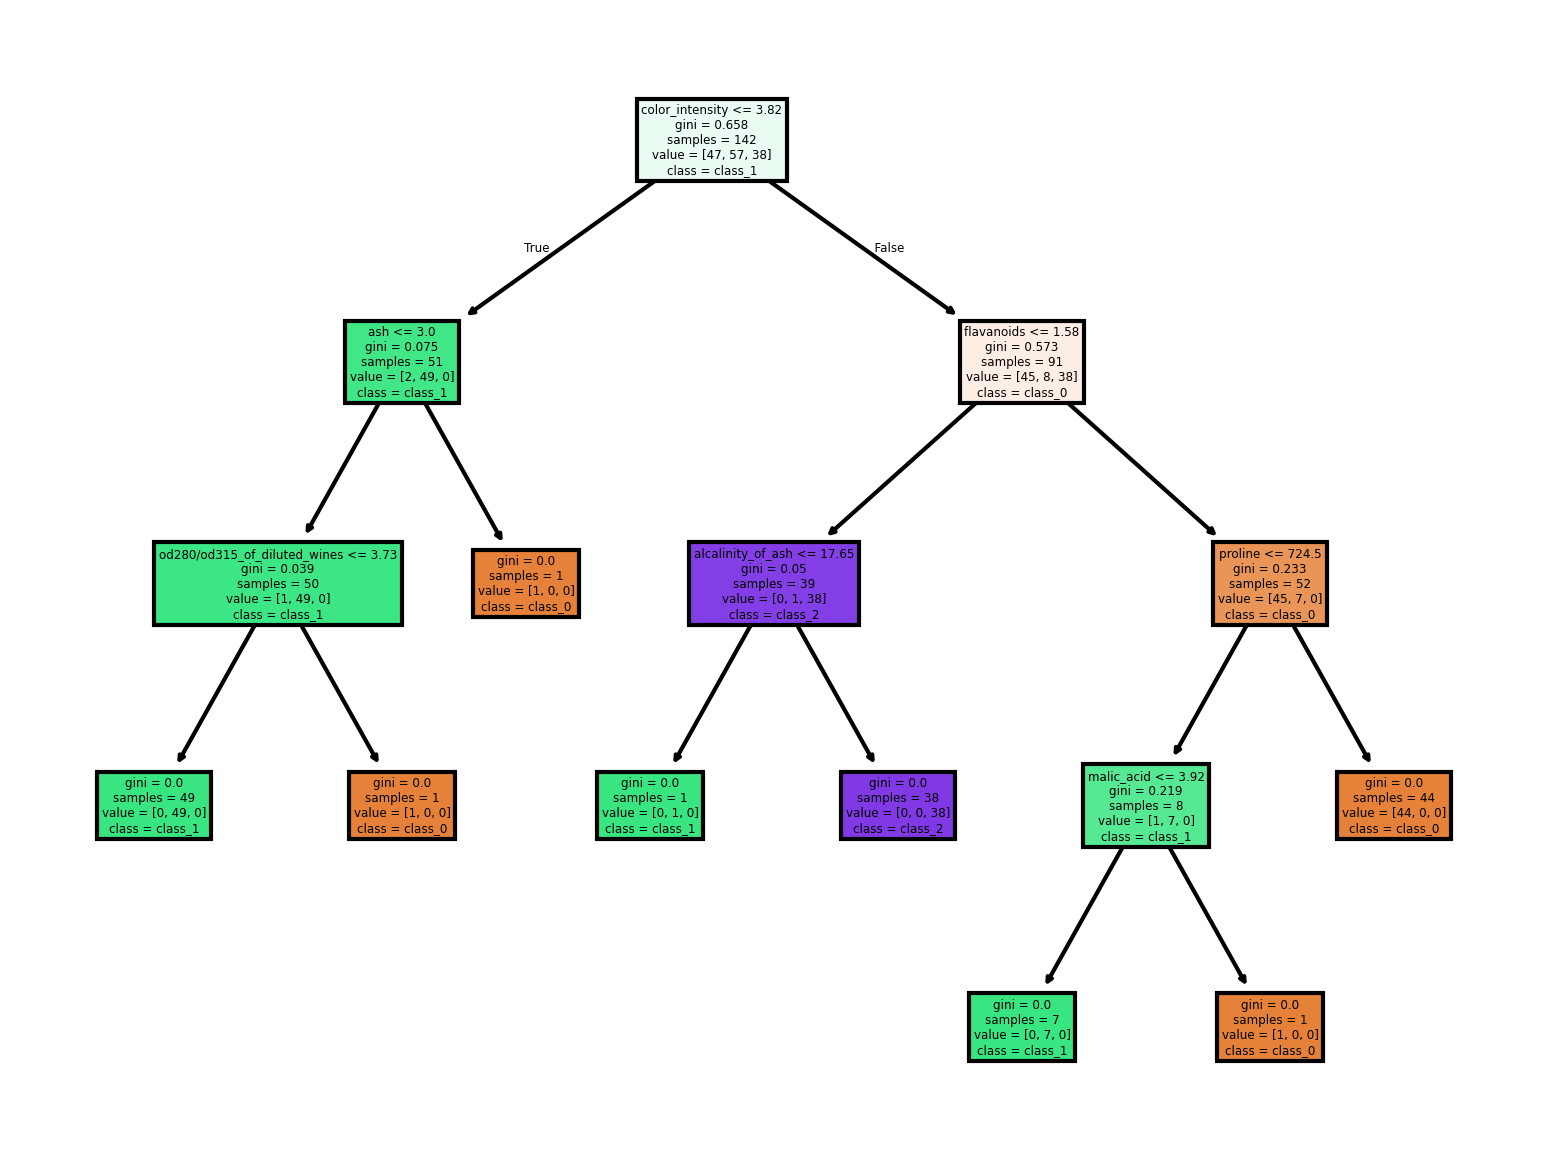

In [200]:
plt.figure(dpi=300)
plot_tree(decision_tree, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

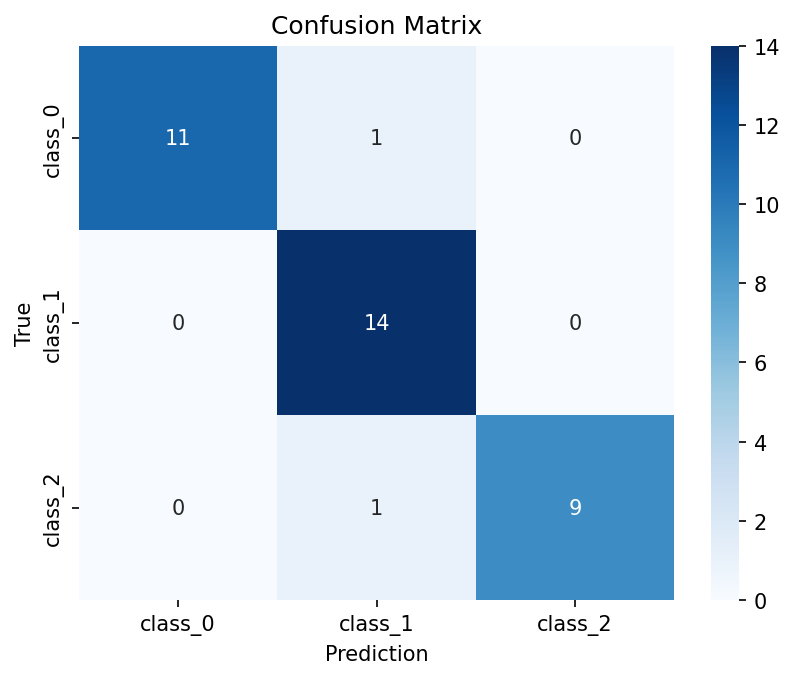

In [201]:
# confusion matrix - decision tree
y_pred = decision_tree.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=150)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [202]:
# accuracy report - decision tree
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_dt:.10f}")

Accuracy Score: 0.9444444444


In [203]:
# classification report - decision tree
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

     class_0       1.00      0.92      0.96        12
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



### Random Forest

In [204]:
from sklearn.ensemble import RandomForestClassifier

In [205]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)

# evaluasi akurasi training dan testing
train_acc = random_forest.score(x_train, y_train)
test_acc = random_forest.score(x_test, y_test)

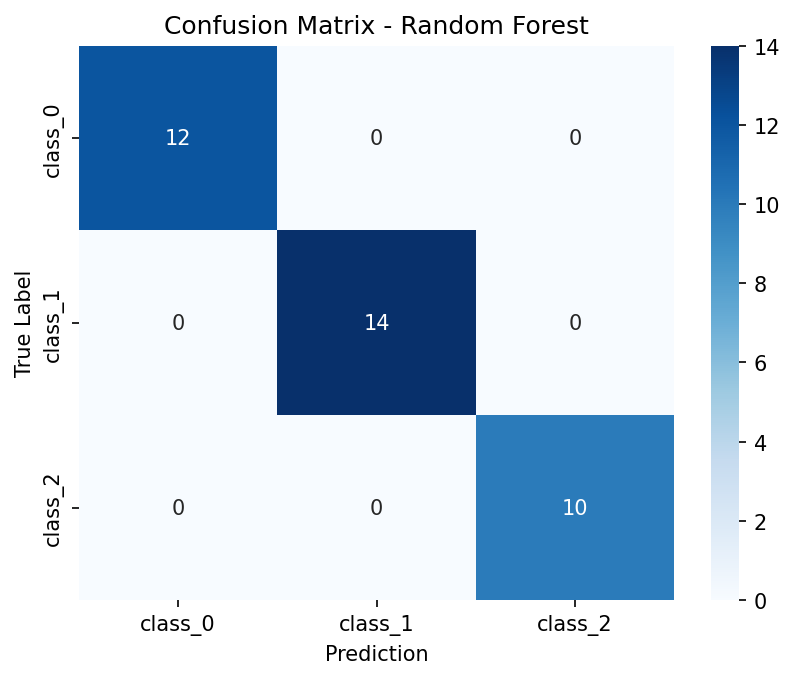

In [206]:
# prediksi data test
y_pred_rf = random_forest.predict(x_test)

# confusion Matrix - Random forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(dpi=150)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Prediction")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [207]:
# accuracy report - decision tree
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Score: {accuracy_rf:.10f}")

Accuracy Score: 1.0000000000


In [208]:
# classification report - random forest
print(classification_report(y_test, y_pred_rf, target_names=data.target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Naive Bayes

In [209]:
from sklearn.naive_bayes import GaussianNB

In [210]:
naive_bayes = GaussianNB()

# training model
naive_bayes.fit(x_train, y_train)

# evaluasi model
train_acc = naive_bayes.score(x_train, y_train)
test_acc = naive_bayes.score(x_test, y_test)

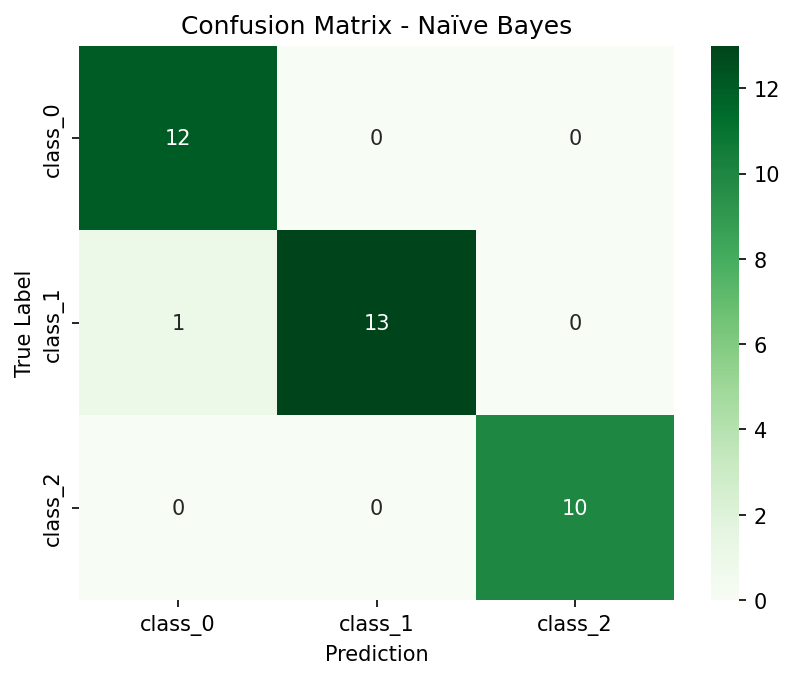

In [211]:
# prediksi data test
y_pred_nb = naive_bayes.predict(x_test)

# confusion matrix - naive bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(dpi=150)
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Greens", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Prediction")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()

In [212]:
# accuracy score - naive bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy Score: {accuracy_nb:.10f}")

Accuracy Score: 0.9722222222


In [213]:
# classification report - naive bayes
print(classification_report(y_test, y_pred_nb, target_names=data.target_names))

              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.93      0.96        14
     class_2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



### KNN

In [214]:
from sklearn.neighbors import KNeighborsClassifier

In [215]:
kneighbor = KNeighborsClassifier(n_neighbors=5)
kneighbor.fit(x_train, y_train)

# evaluasi model
train_acc = kneighbor.score(x_train, y_train)
test_acc = kneighbor.score(x_test, y_test)

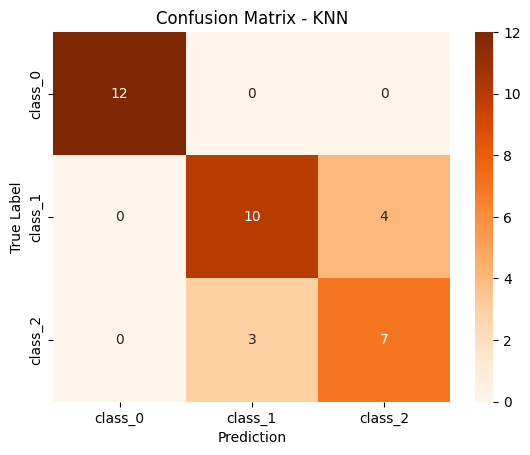

In [216]:
# prediksi data test
y_pred_knn = kneighbor.predict(x_test)

# Confusion matrix - knn
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Oranges", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Prediction")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN")
plt.show()

In [217]:
# classification report - knn
print("Classification Report - KNN:")
print(classification_report(y_test, y_pred_knn, target_names=data.target_names))


Classification Report - KNN:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.77      0.71      0.74        14
     class_2       0.64      0.70      0.67        10

    accuracy                           0.81        36
   macro avg       0.80      0.80      0.80        36
weighted avg       0.81      0.81      0.81        36



In [218]:
# accuracy report - knn
accuracy_knn = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Score: {accuracy_knn:.10f}")

Accuracy Score: 1.0000000000


## Overall Performance
Perbandingan akurasi dari setiap model

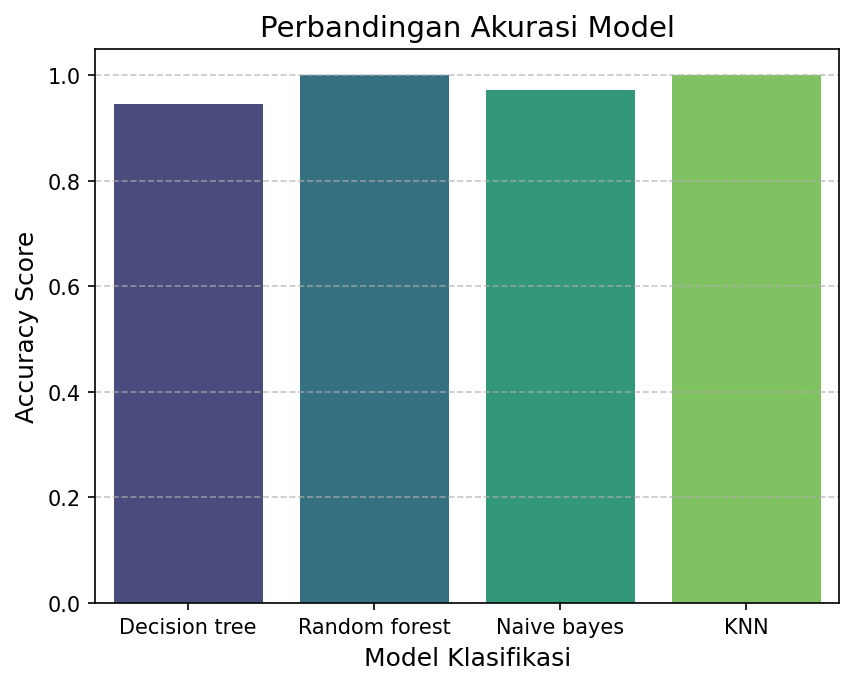

In [225]:
accuracy = {
    "Decision tree": accuracy_dt,
    "Random forest": accuracy_rf,
    "Naive bayes": accuracy_nb,
    "KNN": accuracy_knn
}

plt.figure(dpi=150)
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), hue=list(accuracy.keys()), palette="viridis")

plt.title("Perbandingan Akurasi Model", fontsize=14)
plt.xlabel("Model Klasifikasi", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()